In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

# Business Problem 1 

In [3]:
bp1 = pd.read_csv("LoansData.csv")

In [4]:
bp1

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


## a

Data pre-processing and cleaning

In [15]:
bp1['Interest.Rate'] = np.where(bp1['Interest.Rate'].str.find('%')> -1, bp1['Interest.Rate'].str [:-1], bp1['Interest.Rate'])
bp1['Interest.Rate']  = pd.to_numeric(bp1['Interest.Rate'])

In [22]:
bp1['Interest.Rate'] = bp1['Interest.Rate'].fillna(bp1['Interest.Rate'].mean())
bp1['Amount.Requested'] = bp1['Amount.Requested'].fillna(bp1['Amount.Requested'].mean())

In [27]:
stats.pearsonr(bp1['Amount.Requested'],bp1['Interest.Rate'])

(0.33244640596656816, 1.4148683739824417e-65)

Inferences

We run the pearson's correlation test to calculate the r value and p value.

H0 = there is no relationship between the variables
H1 = there is a significant relationship between the variables

p = 1.4148683739824417e-65 and r = 0.33

p << 0.05 which means this is a significant relationship and r = 0.33 shows slight positive correlation.

We reject the null hypothesis.

So we can say there is slight positive relationship between loan amounts (predictor) and interest rate (response). 


## b

In [29]:
bp1['Loan.Length'].value_counts()

36 months    1952
60 months     548
Name: Loan.Length, dtype: int64

Here we can treat loan length as categorical because the company is only having two options for customers.

In [31]:
months_36 = bp1['Interest.Rate'].loc[bp1['Loan.Length'] == "36 months"]
months_60 = bp1['Interest.Rate'].loc[bp1['Loan.Length'] == "60 months"]

In [33]:
uneq_var = stats.ttest_ind(a= months_36, b= months_60, equal_var=False)    
uneq_var

Ttest_indResult(statistic=-21.95198674784804, pvalue=4.083998134229461e-84)

In [34]:
eq_var = stats.ttest_ind(a= months_36, b= months_60, equal_var=True)     
eq_var 

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110)

In [35]:
months_36.mean()

12.127141791302005

In [36]:
months_60.mean()

16.40746350364961

We run the independent t-test for 2 samples.

H0 = both length categories have same mean for interest rates applied

H1 = length categories affect the mean for interest rates applied

The results we get are as follows: t = -21.95198674784804, p value = 4.083998134229461e-84

p << 0.05 so we say this is significant and we reject H0

So, we say that the loan length is affecting the interest rate directly with 60 month interest being more on average.

## c

In [63]:
possible_purposes = bp1['Loan.Purpose'].unique()

individual_series = []
for i in possible_purposes:
    individual_series.append( bp1['Interest.Rate'].loc[bp1['Loan.Purpose'] == i] )

print (len(individual_series))

for i in range(0,14):
    print ("individual_series[",i, "]", end =",")
 

14
individual_series[ 0 ],individual_series[ 1 ],individual_series[ 2 ],individual_series[ 3 ],individual_series[ 4 ],individual_series[ 5 ],individual_series[ 6 ],individual_series[ 7 ],individual_series[ 8 ],individual_series[ 9 ],individual_series[ 10 ],individual_series[ 11 ],individual_series[ 12 ],individual_series[ 13 ],

In [64]:
stats.f_oneway( individual_series[ 0 ],individual_series[ 1 ],individual_series[ 2 ],individual_series[ 3 ],individual_series[ 4 ],individual_series[ 5 ],individual_series[ 6 ],individual_series[ 7 ],individual_series[ 8 ],individual_series[ 9 ],individual_series[ 10 ],individual_series[ 11 ],individual_series[ 12 ],individual_series[ 13 ])

F_onewayResult(statistic=7.482638784097435, pvalue=1.1599665535989115e-14)

We run the ANOVA test because we have 1 categorical variable (with 14 groups) and 1 continuous numeric variable 

H0 = loan purpose has no effect on interest rate

H1 = loan purpose affects interest rate

The results we get are as follows: p value = 1.16 e-14

p << 0.05 so we say this is significant and we reject H0

So, we say that the loan purpose is affecting the interest rate directly

## d

In [80]:
bp1['FICO.Range'] = bp1['FICO.Range'].fillna(bp1['FICO.Range'].mode()[0])

In [83]:
bp1['Mean value of FICO score'] = (bp1['FICO.Range'].str[4:].astype(int)  + bp1['FICO.Range'].str[:3].astype(int))/2

In [85]:
bp1["Home.Ownership"].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [88]:
mort = bp1['Mean value of FICO score'].loc[bp1['Home.Ownership'] == "MORTGAGE"]
rent = bp1['Mean value of FICO score'].loc[bp1['Home.Ownership'] == "RENT"]
own = bp1['Mean value of FICO score'].loc[bp1['Home.Ownership'] == "OWN"]
oth = bp1['Mean value of FICO score'].loc[bp1['Home.Ownership'] == "OTHER"]
non = bp1['Mean value of FICO score'].loc[bp1['Home.Ownership'] == "NONE"]

In [89]:
stats.f_oneway(mort, rent, own, oth, non)

F_onewayResult(statistic=19.319591748262518, pvalue=1.1459371660127088e-15)

In [90]:
print(mort.mean())
print(rent.mean())
print(own.mean())
print(oth.mean())
print(non.mean())

713.6608544027899
702.0305410122164
708.55
674.0
802.0


We first perform some initial feature engineering by converting the categorical variable to a useful numeric variable. This is done by taking the mean value of each interval of FICO scores and using it as a placeholder for FICO score.

Then we run the ANOVA test because we have 1 categorical variable (with 5 groups) and 1 continuous numeric variable 

H0 = ownership status has no effect on FICO score

H1 = ownership status affects FICO score

The results we get are as follows: p value = 1.15 e-15

p << 0.05 so we say this is significant and we reject H0

So, we say that the ownership status affects FICO score. People owning houses are having high FICO score but those on mortgage are even higher on the FICO score scale.

# Business Problem 2 

In [91]:
quotes = pd.read_csv("Price_Quotes.csv")

In [92]:
quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [93]:
barry_price = quotes['Barry_Price']
mary_price = quotes['Mary_Price']

In [94]:
stats.ttest_rel(a= barry_price,b= mary_price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

In [95]:
print("Barry's mean quote is  {}".format(barry_price.mean()))
print("Mary's mean quote is  {}".format(mary_price.mean()))

Barry's mean quote is  124.33333333333333
Mary's mean quote is  114.75


We run the paired 2-sample t-test because we have to compare how 2 different people quote the same 12 orders.

H0 = Barry and Mary have no significant difference in their quotes 

H1 = Barry and Mary have a significant difference in their quotes 

The results we get are as follows: p value = 0.03

p < 0.05 so we say this is significant and we reject H0

So, we say that the people quoted the items differently. Barry had a higher average on all orders so he was quoting higher.

# Business Problem 3

In [96]:
treat = pd.read_csv("Treatment_Facility.csv")

In [97]:
treat

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [219]:
treat.columns = ['Month','Reengineer','Employee_Turnover','TRFF', 'CI' ]

In [221]:
prior_emp = treat.Employee_Turnover.loc[(treat.Reengineer == "Prior")]
post_emp = treat.Employee_Turnover.loc[(treat.Reengineer == "Post")]

In [222]:
uneq_var = stats.ttest_ind(a= prior_emp,b= post_emp, equal_var=False) # Unequal variance
uneq_var

Ttest_indResult(statistic=-1.5653912078421088, pvalue=0.15207128913702453)

In [223]:
eq_var = stats.ttest_ind(a= prior_emp,b= post_emp, equal_var=True) # equal variance
eq_var

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

We run the independent 2-sample t-test because we have to compare employee turnover for pre and post changes (but not in a paired manner).

H0 = There has been no change in the turnover between pre and post re-engineering 

H1 = There has been a change in the turnover between pre and post re-engineering 

We see that there is unequal variance due to difference in t value.
The results we get are as follows: p value = 0.15

p > 0.05 so we say this is not significant and we accept H0

So, the employee turnover has had no significant change.

In [228]:
prior_ci = treat.CI.loc[(treat.Reengineer == "Prior")]
post_ci = treat.CI.loc[(treat.Reengineer == "Post")]

uneq_var = stats.ttest_ind(a= prior_ci,b= post_ci, equal_var=False)  
print("Unequal variance test:")
print(uneq_var)
eq_var = stats.ttest_ind(a= prior_ci,b= post_ci, equal_var=True)  
print("Equal variance test:")
print(eq_var, "\n")
print(prior_ci.mean(), post_ci.mean())

Unequal variance test:
Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193176)
Equal variance test:
Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149) 

53.887906321846145 23.34971927988571


We run the independent 2-sample t-test because we have to compare critical incidents no. for pre and post changes (but not in a paired manner).

H0 = There has been no change in the CI rate between pre and post re-engineering 

H1 = There has been a change in the CI rate between pre and post re-engineering 

We see that there is unequal variance due to difference in t value.
The results we get from unequal variance (Welch's) are as follows: p value = 0.045

p < 0.05 so we say this is significant and we reject H0

So, the CI has had a significant change after the re-engineering and CI rate has fallen.

In [230]:
prior_tf = treat.TRFF.loc[(treat.Reengineer == "Prior")]
post_tf = treat.TRFF.loc[(treat.Reengineer == "Post")]

uneq_var = stats.ttest_ind(a= prior_tf,b= post_tf, equal_var=False)  
print("Unequal variance test:")
print(uneq_var)
eq_var = stats.ttest_ind(a= prior_tf,b= post_tf, equal_var=True)  
print("Equal variance test:")
print(eq_var, "\n")
print(prior_tf.mean(), post_tf.mean())

Unequal variance test:
Ttest_indResult(statistic=3.690382530309883, pvalue=0.0022744273676772084)
Equal variance test:
Ttest_indResult(statistic=2.7833984488804506, pvalue=0.012265082138734354) 

20.54033531733077 9.232041695285714


We run the independent 2-sample t-test because we have to compare removals (TRFF) for pre and post changes

H0 = There has been no change in the TRFF rate between pre and post re-engineering 

H1 = There has been a change in the TRFF rate between pre and post re-engineering 

We see that there is unequal variance due to difference in t value.
The results we get from unequal variance (Welch's) are as follows: p value = 0.002

p < 0.05 so we say this is significant and we reject H0

So, the TRFF has had a significant change after the re-engineering and TRFF rate has fallen.

### Overall inference
The staff turnover had no significant change, but the re-engineering efforts helped reduce behavioural problems.

# Business Problem 4

In [101]:
prioritydf = pd.read_csv("Priority_Assessment.csv")

In [102]:
prioritydf

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [105]:
high = prioritydf['Days'].loc[prioritydf['Priority']== "High"]
med = prioritydf['Days'].loc[prioritydf['Priority']== "Medium"]
low = prioritydf['Days'].loc[prioritydf['Priority']== "Low"]

In [110]:
stats.f_oneway(high, med, low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [109]:
print("High priority jobs are completed on average in {} days".format(high.mean()))
print("Medium priority jobs are completed on average in {} days".format(med.mean()))
print("Low priority jobs are completed on average in {} days".format(low.mean()))

High priority jobs are completed on average in 3.023619631901845 days
Medium priority jobs are completed on average in 2.5000000000000004 days
Low priority jobs are completed on average in 4.228358208955225 days


We run the ANOVA test because we have 1 categorical variable and 1 continuous numeric variable 

H0: the means of the different priorities are not statistically different

H1: the means of the different priorities are statistically different

The results we get are as follows: p value = 0.16

p > 0.05 so we say this is not significant and we accept H0

So, we say that the no. of days taken for each priority level are not statistically different. The priority level is not really affecting the days taken (assuming our chosen CI of 95%)

# Business Problem 5

## Q1

In [113]:
films = pd.read_csv("Films.csv")
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [119]:
films['Overall'].median()

2.0

The overall customer satisfaction has been at level 2 (which is the median and the mode).

This means it is 'good'

## Q2

In [129]:
films['Gender'] = pd.Series(np.where( (films['Gender'] == 'Male') | (films['Gender'] == '1') ,1,2))

In [131]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
movie_name = label_encoder.fit_transform(films['Movie'])

In [132]:
films['Marital_Status'] = pd.Series(np.where( (films['Marital_Status'] == 'Married') | (films['Marital_Status'] == '1') ,1,2))

In [134]:
films['Movie_name_encoded'] = movie_name

In [145]:
films.isnull().sum()

_rowstate_             0
Movie                  0
Gender                 0
Marital_Status         0
Sinage                 2
Parking                2
Clean                  3
Overall                2
Age                    2
Income                16
Hear_About             7
Movie_name_encoded     0
dtype: int64

In [148]:
films.Age = films.Age.fillna(films.Age.median())
films.Income = films.Income.fillna(films.Income.median())
films.Overall = films.Overall.fillna(films.Overall.median())
films.Sinage = films.Sinage.fillna(films.Sinage.median())
films.Parking = films.Parking.fillna(films.Parking.median())
films.Clean = films.Clean.fillna(films.Clean.median())

In [150]:
import statsmodels.api as sm
Y = films['Overall']
X = sm.add_constant(films[['Movie_name_encoded', 'Marital_Status', 'Gender','Sinage', 'Parking', 'Clean', 
                           'Age','Income']])
mod = sm.OLS(Y, X)
res = mod.fit()
res.summary()

/Users/arjun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     17.75
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.41e-22
Time:                        17:15:46   Log-Likelihood:                -283.83
No. Observations:                 330   AIC:                             585.7
Df Residuals:                     321   BIC:                             619.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3706      0.329      1.125      0.261      -0.277       1.019
Movie_name_encoded    -0.0194      0.034     -0.569      0.570      -0.086       0.048
Marital_Status         0.1039      0.091      1.145      0.253      -0.075       0.283
Gender                -0.0242      0.067     -0.359      0.720      -0.157       0.108
Sinage                 0.1264      0.045      2.780      0.006       0.037       0.216
Parking                0.3383      0.049      6.922      0.000       0.242       0.434
Clean                  0.1172      0.050      2.344      0.020       0.019       0.215
Age                    0.0238      0.058      0.411      0.681      -0.090       0.138
Income                 0.0266      0.042      0.627      0.531      -0.057       0.110
==============================================================================
Omnibus:                      151.370   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1405.458
Skew:                           1.655   Prob(JB):                    6.44e-306
Kurtosis:                      12.553   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference

For this question we first do some data cleaning and preprocessing such as median imputation and label encoding.

Then, we run a linear regression to see which factors can affect the overall customer satisfaction.

The only variables which have a low enough p value (<0.05) are "Sinage", "Parking" and "Clean"

Out of these, Parking affected the satisfaction the most.

## Q3

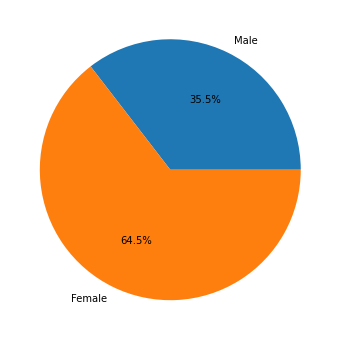

In [195]:
gender_demo = films.groupby(by="Gender")[["Gender"]].count().add_prefix("Count_") 
plt.pie(x = gender_demo['Count_Gender'],
        labels = ['Male','Female'],
        autopct = "%.1f%%")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

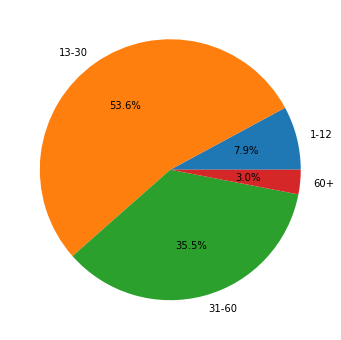

In [199]:
age_demo = films.groupby(by="Age")[["Age"]].count().add_prefix("Count_") 
plt.pie(x = age_demo['Count_Age'],
        labels = [  "1-12",   "13-30", "31-60",  "60+"],
        autopct = "%.1f%%")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

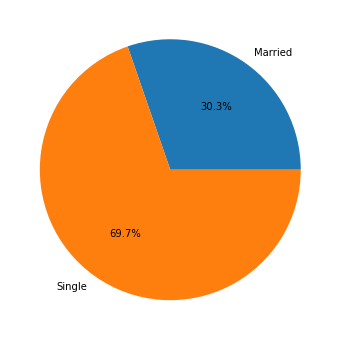

In [197]:
marry_demo = films.groupby(by="Marital_Status")[["Marital_Status"]].count().add_prefix("Count_") 
plt.pie(x = marry_demo['Count_Marital_Status'],
        labels = ['Married','Single'],
        autopct = "%.1f%%")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

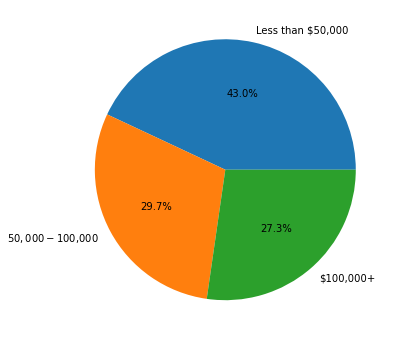

In [204]:
inc_demo = films.groupby(by="Income")[["Income"]].count().add_prefix("Count_") 
plt.pie(x = inc_demo['Count_Income'],
        labels = ["Less than $50,000", "$50,000-$100,000", "$100,000+"],
        autopct = "%.1f%%")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

### Inference

From above pie charts we can infer what the demographic composition of the movie-goers is:

We see that Females is the more popular sex, 13-30 year olds form over half of the patron population, 70% people are single, and majority of people have income of less than $50,000.

## Q4

In [213]:
films["Hear_About"] = films["Hear_About"] .fillna(films["Hear_About"].mode()[0])
ctr = 0 
for i in films["Hear_About"]:
    films["Hear_About"] [ctr] = re.split(',', str(i))
    ctr = ctr+1
films

/var/folders/jt/dpcpyp4n5mggjjbh2lylsglh0000gn/T/ipykernel_30216/2322263842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films["Hear_About"] [ctr] = re.split(',', str(i))


,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Movie_name_encoded
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,[5],0
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,[5],0
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,[5],0
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,[5],0
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,[1],0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,[1],1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,[5],1
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,[5],1
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,[3],1


In [216]:
count_for_each = [0,0,0,0,0]
for i in films["Hear_About"]:
    if ('1' in i):
        count_for_each[0]+=1
    if ('2' in i):
        count_for_each[1]+=1
    if ('3' in i):
        count_for_each[2]+=1
    if ('4' in i):
        count_for_each[3]+=1
    if ('5' in i):
        count_for_each[4]+=1
        
count_for_each = pd.Series(count_for_each)

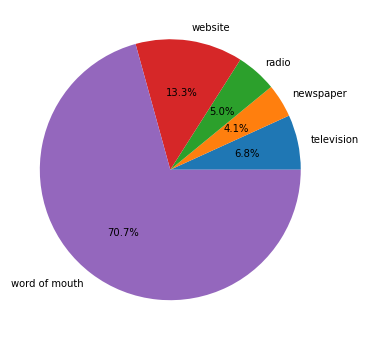

In [218]:
plt.pie(x = count_for_each,
        labels = ["television","newspaper", "radio", "website",   "word of mouth"],
        autopct = "%.1f%%")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

### Inference

From above analysis and pie chart we can infer about the marketing performance that:

Word-of-mouth was the most successful form of advertisement till now. It accounted for 71% of customers.

The other modes were website and TV, in that order.